
# Projeto 1 Visão de máquina

## Alunos: Fernando Sakabe & Giovanni Rozatti

In [92]:
#Célula de imports
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from filtros_extras import *
from fillHoles import fillHoles

imagem de indice 1
49.91712765430841
imagem de indice 2
49.77100387332946
imagem de indice 3
50.198603802778585
imagem de indice 4
50.02464850117841
imagem de indice 5
50.040630881241924
imagem de indice 7
49.29822531272107
imagem de indice 9
49.42252707293653
imagem de indice 10
49.49653295081432
imagem de indice 11
49.70597710196427
imagem de indice 13
50.13901057205801
imagem de indice 14
50.09377922598771
imagem de indice 15
49.723023542269004


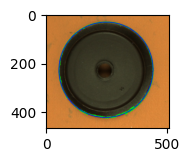

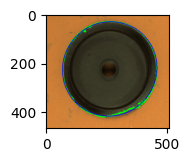

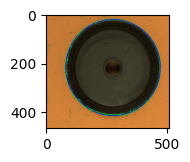

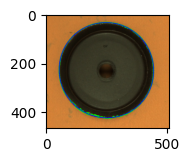

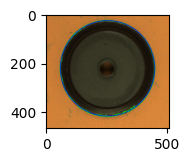

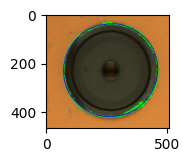

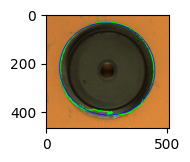

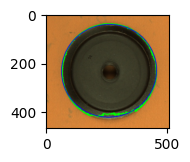

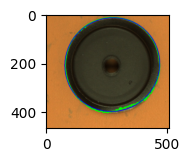

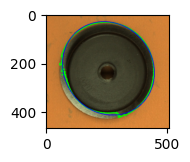

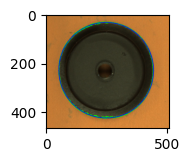

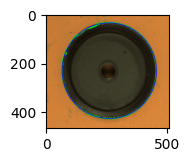

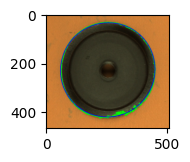

In [124]:
path = "OK"
#path = "NOK_borda"
dir_list = os.listdir(path)
for k in range(0,len(dir_list)):
    #encontrar uma maneira mais bonita de fazer a soma das strings abaixo
    img_in = cv2.imread(path + "/" + str(dir_list[k]), cv2.IMREAD_COLOR)
    #img_in = cv2.imread("OK\Fig_OK_15.jpg", cv2.IMREAD_COLOR)
    if img_in is None:
        print("File not found. Bye!")
        exit(0) #Essa linha "crasha" o notebook, caso ocorra reinicar o kernel
    [B,G,R] = cv2.split(img_in)
    returns,thresh=cv2.threshold(G,90,255,cv2.THRESH_BINARY_INV)
    thresh_inverse_8=np.clip(thresh, 0, 255).astype(np.uint8)
    img_out=fillHoles(thresh_inverse_8)
    contours,hierachy=cv2.findContours(img_out,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) != 0:
        for i in range(len(contours)):
            if len(contours[i]) >= 800:
    #blob
                cv2.drawContours(img_in,[contours[i]],-1,(0,255,0),3)
                ellipse = cv2.fitEllipse(contours[i])
                cv2.ellipse(img_in,ellipse, (0,0,255), 2)
                plt.figure(figsize=(10,5))
                plt.subplot (3,5,k+1)
                plt.imshow(img_in, cmap="gray")
                (x, y), (MA, ma), angle = ellipse
                if MA/ma>0.95 and MA/ma<1.05:
                    print('imagem de indice '+str(k+1))
                    print((MA + ma)/508*65/2)
plt.show()


In [113]:
#interpretação das rubricas

#tamanho é o diametro
#forma é a relação a/b dos raios das elipses
#borda é as convexidade

# FIG NOK15 é uma bem dificil de detectar o erro

#Achar o erro do contorno:
#a partir da posição central da circunferencia comparar os pontos detectados do contorno com os pontos da circunferencia teórica

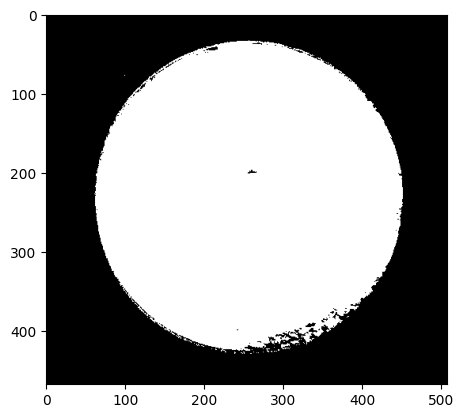

In [ ]:
6508*